In [1]:
import pandas as pd
from math import floor, ceil
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image

# What is the purpose of Descriptive Analytics?

Data comes in many shapes and forms and often in large quantities. The human mind is incapable of knowing what to do with large amounts of information. 

### The purpose of Descriptive Analytics is to summarize data into insightful statistics that solve a business problem. 

# Our first sample dataset- Hotel Reservations

In [2]:
# Reading the dataset into a pandas dataframe
reservations_df = pd.read_csv("Data/hotel_data.csv")
print(f"Imported data. There are {reservations_df.shape[0]} rows and {reservations_df.shape[1]} columns in the dataset")

Imported data. There are 36275 rows and 19 columns in the dataset


In [3]:
# Show the first few rows
reservations_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


### N.B.: Data Quality
In all data science projects, we must confirm data quality by checking such things as:
- Missing entries for each column
- Primary keys of tables
- Duplicated primary keys of tables
- Full entries duplicated
- Outliers in column values

### Data Dictionary
#### What does each column represent


Booking_ID: unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

type_of_meal_plan: Type of meal plan booked by the customer:

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.

# Exercise objective

Understand how cancellations are influencing overall revenue of the hotel 

# Stats 101

Statistics are scalar values that summarize a set of data observations.

Exercise: For the data observation set of "avg_price_per_room" what are some meaningful statistics?

In [4]:
prices_df = reservations_df["avg_price_per_room"]
prices_df

0         65.00
1        106.68
2         60.00
3        100.00
4         94.50
          ...  
36270    167.80
36271     90.95
36272     98.39
36273     94.50
36274    161.67
Name: avg_price_per_room, Length: 36275, dtype: float64

## Measures of central tendency
These type of statistics summarize what the center of the dataset looks like

## Mean

Mean = sum(each_observations)/ total_number_of_observations

The mean tells us what the average of the set of data observations is. It's important to note that this measure uses the actual values of all entries in the dataset in its calculation.

In [5]:
# Option 1: Pure python way
sum(value for value in prices_df)/sum(1 for value in prices_df)

103.4235390764958

In [6]:
# Option 2: using pandas to write formula
prices_df.sum()/prices_df.count()

103.42353907649897

In [7]:
# Option 3: Leveraging the function available in pandas.
prices_df.mean()

103.42353907649897

The average price of a night over the entire dataset is 103 Euros. (Kinda expensive if you ask me)

### N.B. There are many ways to code these statistics using python and pandas, we'll now focus on the most compact way (Option 3)

# Median
median =  The value of the entry located at exactly half way through the set of data observations if it were ordered

e.g. set of data observations (1,2,2,5,5): The median is the 3rd entry = 2

Note that the calculation of the median only uses the value of one of the data observations the one in the middle.

In [8]:
prices_df.median()

99.45

## N.B. The median is a special case of quantiles where quantiles represented the entry located n-th way through the set of data observations if it were ordered.

In [9]:
prices_df.quantile(0.5)

99.45

In [10]:
prices_df.quantile(0.25)

80.3

# Mode

mode= The value of the entry that appears the most frequently in the set of data observations

Note that the mode, like the median, only uses the value of one of the entries in the dataset, the most common one. 

In [11]:
prices_df.mode()[0]

65.0

# The Relationship between Mean, Median and Mode

When the mean, median and mode have all the same value, it is a sign that the data is symmetric.

N.B. This doesn't happen too often with small datasets of randome processes but as data becomes larger, they often get closer to each other.

In [12]:
# Example of when a set of data observations has mean, median and mode equal
artificial = np.array([1,2,3,3,3,4,5])
art_df = pd.DataFrame (artificial, columns = ['value'])["value"]
mean = art_df.mean()
median = art_df.median()
mode = art_df.mode()
print(f"Mean: {mean}, Median: {median}, Mode: {mode[0]}")

Mean: 3.0, Median: 3.0, Mode: 3


# Measures of dispersion

Measure how wide the possible values of a set of data observations can be

# Range
Range = maximum_value -  minimum_value

In [13]:
prices_df.max() - prices_df.min()

540.0

# Standard Deviation

Measures how far observations are from the mean

In [14]:
# get the image
Image(url="images/standard_dev.png", width=800, height=800)

In [15]:
prices_df.std()

35.08942403637036

# Interquantile measurements

IQ_measure = quantile_r - quantile_s (r>s)

In [16]:
prices_df.quantile(0.75)-prices_df.quantile(0.25)

39.7

# Visualizing the data

# Histogram

Used to show the frequencies of continuous data

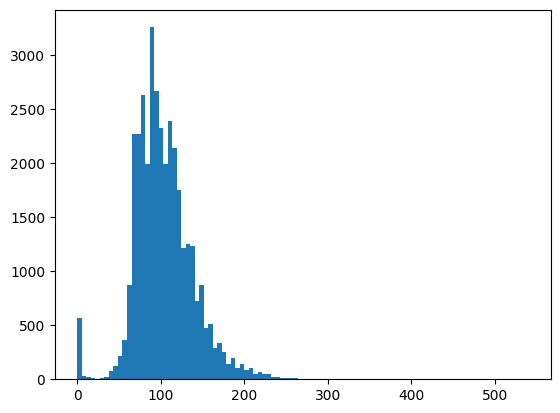

In [17]:
plt.hist(prices_df, bins=100)
plt.show()

# Box Plot
Used to show the distribution of the data

<AxesSubplot: xlabel='avg_price_per_room', ylabel='booking_status'>

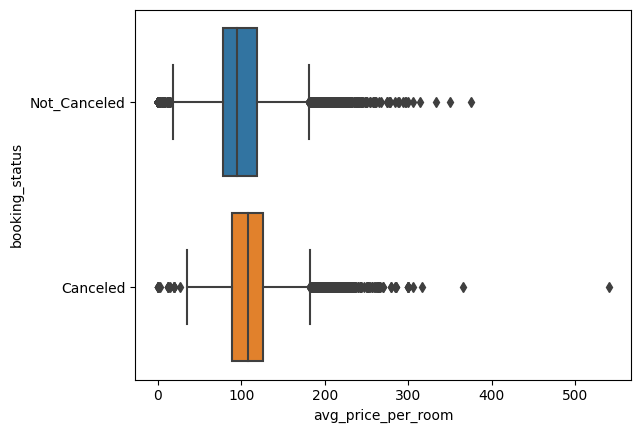

In [18]:
sns.boxplot(x="avg_price_per_room", orient="h", data=reservations_df, y="booking_status")

# Bar chart

Used for catgorical data (data with word values) to show their frequency

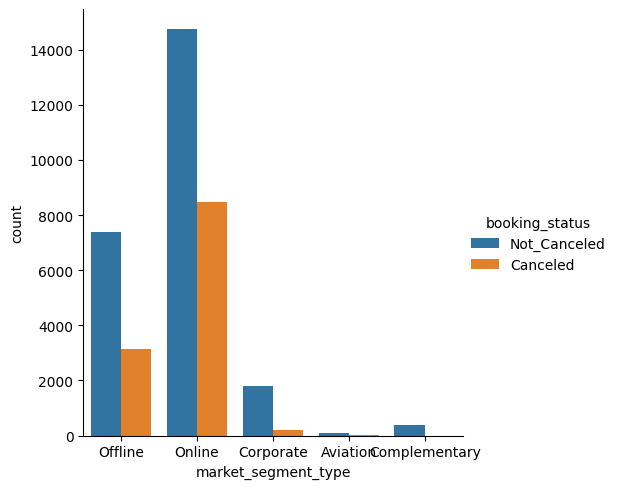

In [19]:
sns.catplot(x='market_segment_type', data=reservations_df, hue="booking_status", kind='count')

# Analysis: Extracting insight by controlling some variables

# Who is getting these very low or free rates?

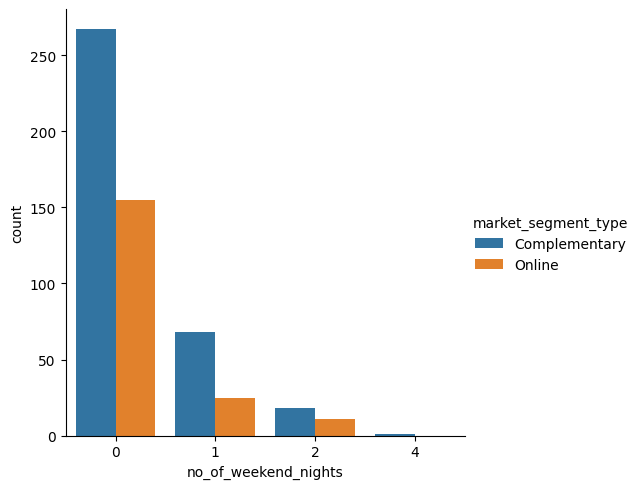

In [20]:
# Look by market segment and number of weekend nights
freebies_df = reservations_df[reservations_df["avg_price_per_room"] == 0].copy()
sns.catplot(x='no_of_weekend_nights', data=freebies_df, hue="market_segment_type", kind='count')

Most compliementary stays are not during the weekend

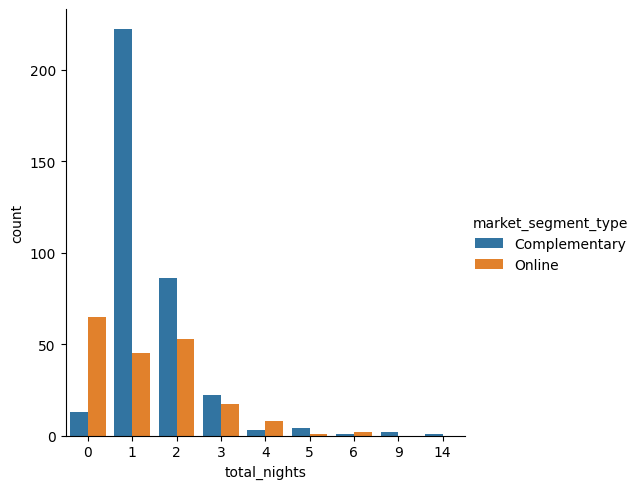

In [21]:
# Now let's create a field for total number of nights
freebies_df["total_nights"] = freebies_df["no_of_weekend_nights"]+freebies_df["no_of_week_nights"]
sns.catplot(x='total_nights', data=freebies_df, hue="market_segment_type", kind='count')

Most are for one night during the week.

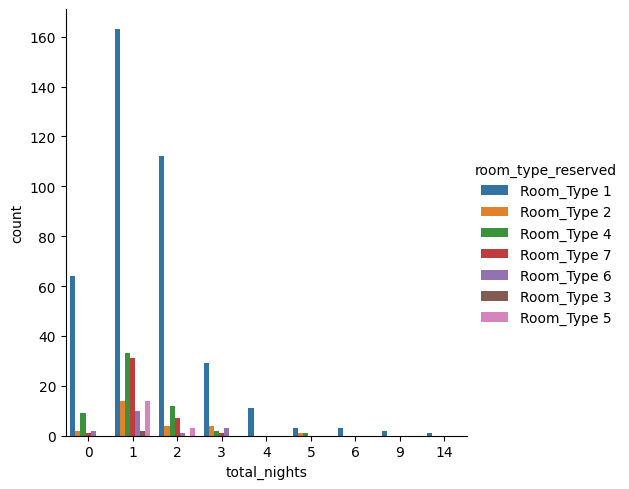

In [22]:
sns.catplot(x='total_nights', data=freebies_df, hue="room_type_reserved", kind='count')    

Most are for room type 1

# What's the average price for room type 1?

In [23]:
room_1_no_0s = reservations_df[(reservations_df["room_type_reserved"] == "Room_Type 1") 
                & (reservations_df["avg_price_per_room"] > 0)].copy()
room_1_prices = room_1_no_0s["avg_price_per_room"]
room_1_prices.describe()

count    27742.000000
mean        97.260050
std         25.781008
min          0.500000
25%         79.065000
50%         94.500000
75%        112.500000
max        540.000000
Name: avg_price_per_room, dtype: float64

<AxesSubplot: xlabel='avg_price_per_room', ylabel='arrival_month'>

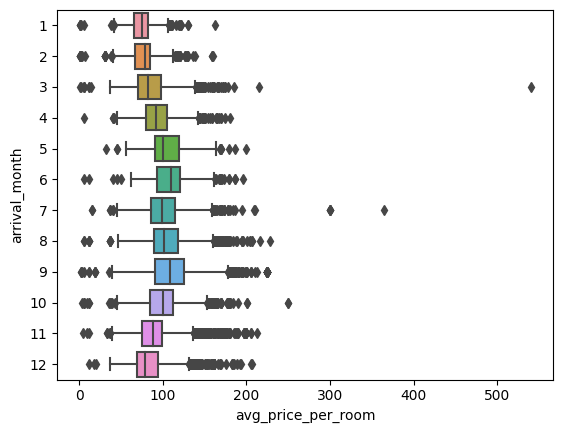

In [24]:
sns.boxplot(x="avg_price_per_room", orient="h", data=room_1_no_0s, y="arrival_month")

<AxesSubplot: xlabel='avg_price_per_room', ylabel='year_month'>

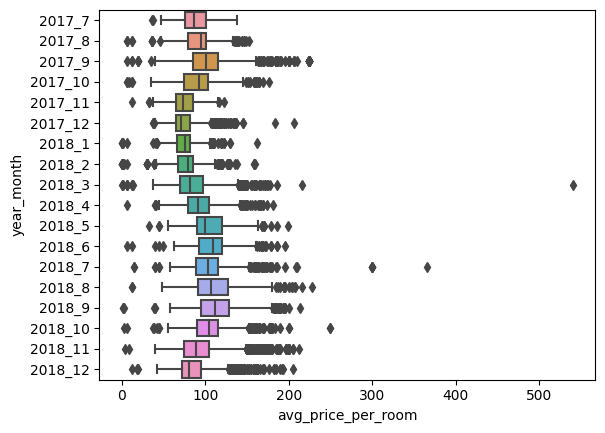

In [25]:
order = [f"2017_{a}" for a in range(7,13,1)] + [f"2018_{a}" for a in range(1,13,1)]
room_1_no_0s["year_month"] = room_1_no_0s["arrival_year"].astype("str")+"_"+room_1_no_0s["arrival_month"].astype("str")
sns.boxplot(x="avg_price_per_room", orient="h", data=room_1_no_0s, y="year_month", order=order)

Most seem to land between 90 - 110 Euros per night with Summer time being the more expensive months

# How does the price for room type differ?

<AxesSubplot: xlabel='avg_price_per_room', ylabel='room_type_reserved'>

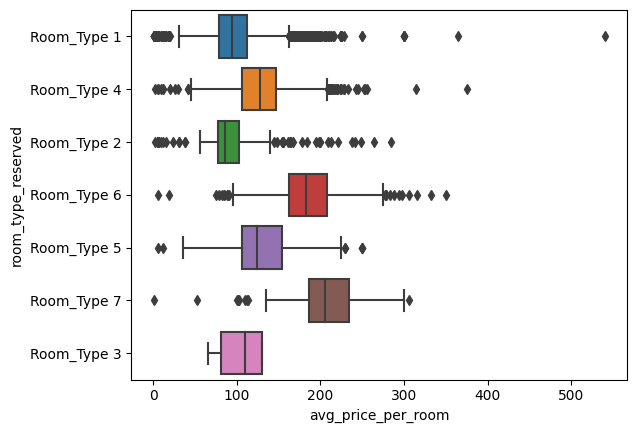

In [26]:
room_prices = reservations_df[(reservations_df["avg_price_per_room"] > 0)]
sns.boxplot(x="avg_price_per_room", orient="h", data=room_prices, y="room_type_reserved")

# How much revenue would they recover by lowering their complementary nights service?

In [27]:
# First let's calculate the average prices for each room type , year, and month (excluding the 0s- complementary)

avg_room_prices = room_prices[["arrival_year","arrival_month","room_type_reserved", "avg_price_per_room"]]\
.groupby(["arrival_year","arrival_month","room_type_reserved",]).mean().reset_index().sort_values(by=["room_type_reserved", "arrival_year", "arrival_month"])
avg_room_prices

,arrival_year,arrival_month,room_type_reserved,avg_price_per_room
0,2017,7,Room_Type 1,86.013152
3,2017,8,Room_Type 1,92.196323
7,2017,9,Room_Type 1,104.173813
13,2017,10,Room_Type 1,92.173878
18,2017,11,Room_Type 1,75.596717
...,...,...,...,...
77,2018,8,Room_Type 7,217.442273
83,2018,9,Room_Type 7,216.487143
90,2018,10,Room_Type 7,220.806111
97,2018,11,Room_Type 7,232.500000


In [28]:
# Next let's calculate the total number of complementary nights for each room
complementary_nights = freebies_df[["arrival_year", "arrival_month", "room_type_reserved", "total_nights"]]\
.groupby(["arrival_year","arrival_month", "room_type_reserved"]).sum().reset_index()
complementary_nights

,arrival_year,arrival_month,room_type_reserved,total_nights
0,2017,7,Room_Type 1,5
1,2017,7,Room_Type 5,1
2,2017,8,Room_Type 1,56
3,2017,8,Room_Type 2,15
4,2017,8,Room_Type 4,5
...,...,...,...,...
70,2018,12,Room_Type 1,25
71,2018,12,Room_Type 2,1
72,2018,12,Room_Type 4,3
73,2018,12,Room_Type 6,7


In [29]:
# Now let's combine the two to do our calculation
full_complementary_info =complementary_nights.merge(avg_room_prices,
                           how="left",
                           on=["arrival_year", "arrival_month", "room_type_reserved"]
                          ).fillna(room_prices["avg_price_per_room"].mean())
full_complementary_info

,arrival_year,arrival_month,room_type_reserved,total_nights,avg_price_per_room
0,2017,7,Room_Type 1,5,86.013152
1,2017,7,Room_Type 5,1,105.001088
2,2017,8,Room_Type 1,56,92.196323
3,2017,8,Room_Type 2,15,72.867368
4,2017,8,Room_Type 4,5,112.214286
...,...,...,...,...,...
70,2018,12,Room_Type 1,25,86.356871
71,2018,12,Room_Type 2,1,86.662571
72,2018,12,Room_Type 4,3,119.609710
73,2018,12,Room_Type 6,7,168.060000


In [30]:
# Now we calculate what the total cost is
full_complementary_info["potential_revenue"] = full_complementary_info["total_nights"]*full_complementary_info["avg_price_per_room"]
full_complementary_info.sort_values('potential_revenue', ascending=False)

,arrival_year,arrival_month,room_type_reserved,total_nights,avg_price_per_room,potential_revenue
7,2017,9,Room_Type 1,63,104.173813,6562.950243
11,2017,10,Room_Type 1,63,92.173878,5806.954294
20,2017,12,Room_Type 1,69,76.780415,5297.848627
2,2017,8,Room_Type 1,56,92.196323,5162.994081
61,2018,10,Room_Type 1,41,104.169808,4270.962134
...,...,...,...,...,...,...
17,2017,11,Room_Type 4,1,68.710929,68.710929
27,2018,1,Room_Type 7,2,1.000000,2.000000
52,2018,7,Room_Type 6,0,189.665862,0.000000
62,2018,10,Room_Type 4,0,130.546905,0.000000


In [31]:
# What is the total revenue lost to complementary bookings
total_lost_rev = full_complementary_info["potential_revenue"].sum()
total_lost_rev

80206.65806781905

In [32]:
# What is their total revenue for the period
reservations_df["total_nights"] = reservations_df["no_of_weekend_nights"]+reservations_df["no_of_week_nights"]
reservations_df["revenue"] = reservations_df["total_nights"] * reservations_df["avg_price_per_room"] 
total_revenue = reservations_df["revenue"].sum()
total_revenue

11347278.74

In [33]:
# What percentage is lost to complementary bookings
total_lost_rev/total_revenue*100

0.7068360609234409

# What is another source of lost revenue? Cancellations

In [34]:
# Let's calculate what the percentage of the total revenue is lost due to cancellations
cancelled_nights = reservations_df[reservations_df["booking_status"] == "Canceled"]
cancelled_summary = cancelled_nights[["arrival_year", "arrival_month", "room_type_reserved", "total_nights"]]\
.groupby(["arrival_year","arrival_month", "room_type_reserved"]).sum().reset_index()
cancelled_summary

,arrival_year,arrival_month,room_type_reserved,total_nights
0,2017,7,Room_Type 1,811
1,2017,7,Room_Type 2,13
2,2017,7,Room_Type 4,10
3,2017,8,Room_Type 1,635
4,2017,8,Room_Type 2,34
...,...,...,...,...
82,2018,12,Room_Type 1,1171
83,2018,12,Room_Type 2,62
84,2018,12,Room_Type 4,282
85,2018,12,Room_Type 6,86


In [35]:
# Now let's combine the two to do our calculation
full_cancelled_info =cancelled_summary.merge(avg_room_prices,
                           how="left",
                           on=["arrival_year", "arrival_month", "room_type_reserved"]
                          ).fillna(room_prices["avg_price_per_room"].mean())
full_cancelled_info

,arrival_year,arrival_month,room_type_reserved,total_nights,avg_price_per_room
0,2017,7,Room_Type 1,811,86.013152
1,2017,7,Room_Type 2,13,82.316667
2,2017,7,Room_Type 4,10,100.916667
3,2017,8,Room_Type 1,635,92.196323
4,2017,8,Room_Type 2,34,72.867368
...,...,...,...,...,...
82,2018,12,Room_Type 1,1171,86.356871
83,2018,12,Room_Type 2,62,86.662571
84,2018,12,Room_Type 4,282,119.609710
85,2018,12,Room_Type 6,86,168.060000


In [36]:
# Now we calculate what the total cost is
full_cancelled_info["potential_revenue"] = full_cancelled_info["total_nights"]*full_cancelled_info["avg_price_per_room"]
full_cancelled_info.sort_values('potential_revenue', ascending=False)

,arrival_year,arrival_month,room_type_reserved,total_nights,avg_price_per_room,potential_revenue
63,2018,9,Room_Type 1,3173,113.094749,358849.639857
69,2018,10,Room_Type 1,3426,104.169808,356885.762702
57,2018,8,Room_Type 1,2982,110.373928,329135.054439
44,2018,6,Room_Type 1,2928,107.140373,313707.010757
51,2018,7,Room_Type 1,2581,105.175074,271456.865642
...,...,...,...,...,...,...
20,2018,1,Room_Type 4,5,83.242895,416.214474
71,2018,10,Room_Type 3,3,130.000000,390.000000
17,2017,12,Room_Type 4,3,91.001839,273.005517
16,2017,12,Room_Type 2,3,84.509825,253.529474


In [37]:
# What is the total revenue lost to cancelled bookings
total_lost_rev_cancel = full_cancelled_info["potential_revenue"].sum()
total_lost_rev_cancel

4309079.845785491

In [38]:
# What percentage does that represent over the total revenue
total_lost_rev_cancel/total_revenue*100

37.974565924741626

# Initial findings of the Analysis
A potential of 37\% of the current total revenue is being lost due to cancelled bookings, mostly from bookings of Room_Type_1 during the peak season.

Our complementary booking program is sustainable as it currently only represents only 0.7% of revenue of the entire period.

# Assignment:

Perform the same analysis conducted for complementary bookings on cancelled bookings, present your conclusions.

### who are the ones cancelling more

In [39]:
cancelled_df = reservations_df[reservations_df["booking_status"] == "Canceled"].copy()


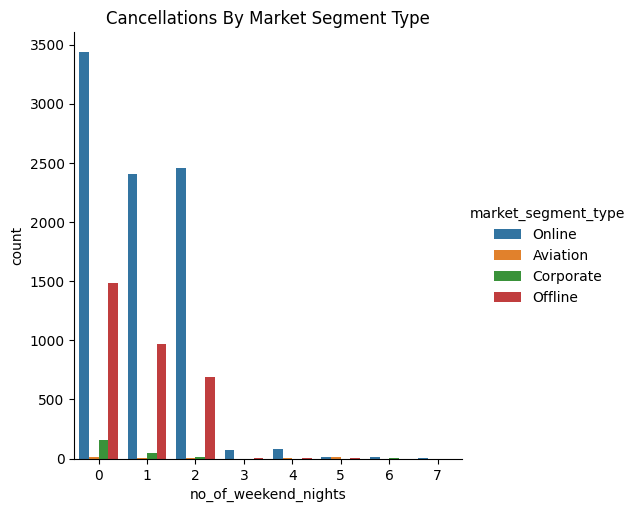

In [40]:
sns.catplot(x='no_of_weekend_nights', data=cancelled_df, hue="market_segment_type", kind='count').set(title="Cancellations By Market Segment Type")

the most cancellations are by the online market segment mostly during the weekdays. 

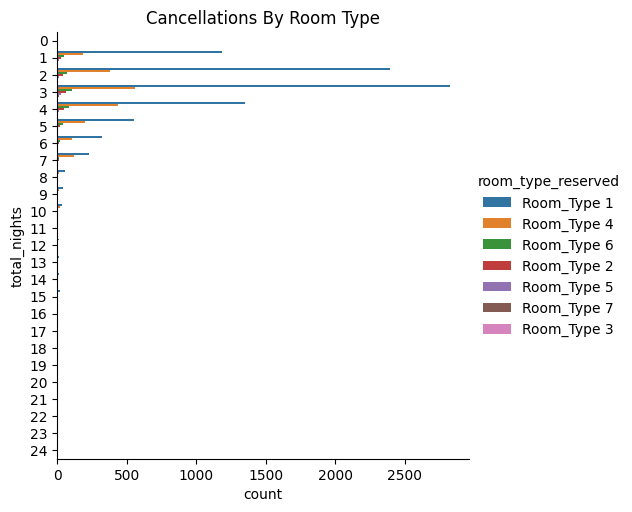

In [41]:
cancelled_df["total_nights"] = cancelled_df["no_of_weekend_nights"] + cancelled_df["no_of_week_nights"]
sns.catplot(y="total_nights", data=cancelled_df, hue="room_type_reserved", kind='count').set(title="Cancellations By Room Type")

Most bookings cancelled are for room type 1 which booked mostly for 3 and 2 nights total. 

### When are they canceling more

In [42]:
cancelled_df["date"] = cancelled_df["arrival_year"].astype("str")+"_" + cancelled_df["arrival_month"].astype("str")
dates_cancelled = cancelled_df[["room_type_reserved", "date"]]

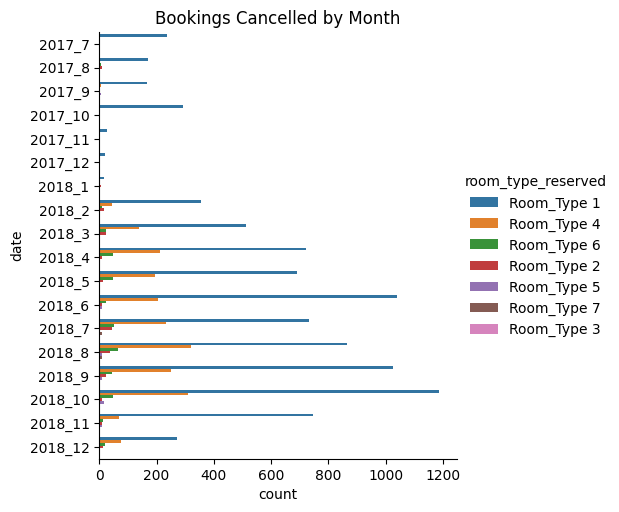

In [43]:
order = [f"2017_{a}" for a in range(7,13,1)] + [f"2018_{a}" for a in range(1,13,1)]
sns.catplot(y="date", data=dates_cancelled, hue="room_type_reserved", kind='count', order=order).set(title='Bookings Cancelled by Month')

most of the cancellations occur during the summer months. Roughly from June to October. 

## how much revenue is lost due to cancelled bookings

In [44]:
cancelled_df['revenue'] = cancelled_df["total_nights"] * cancelled_df['avg_price_per_room']
cancelled_possible_revenue = cancelled_df['revenue'].sum()
cancelled_possible_revenue

4296174.07

Approximately 4.3 million dollars is lost due to cancelled bookings.

### What percentage of total possible revenue is lost due to cancelled bookings

In [45]:
total_possible_rev = reservations_df['revenue'].sum()

In [46]:
cancelled_possible_revenue / total_possible_rev * 100

37.86083138026448

around 37% of the total possible revenue is lost due to cancelled bookings. 